# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "...what we want is a machine that can learn from experience."
> 
> -- Alan Turing, 1947

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Activated                                              | 12  |
| Descending MLR .                                       | 20  |
| Make a Plan                                            | 15  |
| Neuron by Hand                                         | 14  |
| Total                                                  | 61  |


## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Viewing differences in activation functions;
- Applying gradient descent; and,
- Constructing neural networks.


# Assignment - Homework 2
STAT 430 - FDL, Spring 2020

Due: **Friday, February 21st, 2020 at 6:00 PM**

- **Author:** Skyler Shi
- **NetID:** jingtao2

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [1]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")

Diagnostics: 
Notebook is being run locally or through another source.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## [12 points] Exercise 1 - Activated

**(a) (4 points)** During lecture, we claimed that the `tanh(x)` is underpinned by the sigmoid activation function. Given that:

$$
\begin{align}
\sigma(x) &= \frac{ e^x }{1 + e^x} = \frac{ 1 }{1 + e^{-x}} \\
\tanh(x) &= \frac{e^x – e^{-x}}{e^x + e^{-x}} 
\end{align}
$$

Show that:

$$\tanh(x) = 2 \sigma(2x) - 1$$


... proof here ...

$$
\begin{align}
\tanh(x) &= \frac{e^x – e^{-x}}{e^x + e^{-x}} \\
\tanh(x) &= \frac{e^x}{e^x + e^{-x}} - \frac{e^{-x}}{e^x + e^{-x}} \\
\tanh(x) &= \frac{1}{1 + e^{-2x}} - \frac{1}{e^{2x} + 1} \\
\tanh(x) &= \sigma(2x) - \sigma(-2x)
\end{align}
$$

$\sigma(-x)$ is equivalent to flipping $\sigma(x)$ around the axis $ y = 0.5$. Hence we can observe $\sigma(-x) = 1 - \sigma(x)$


$$
\begin{align}
\tanh(x) &= \sigma(2x) - \sigma(-2x) \\
\tanh(x) &= \sigma(2x) - (1 - \sigma(2x)) \\
\tanh(x) &= 2 \sigma(2x) - 1
\end{align}
$$


**(b) (2 points)** Consider the _Exponential Linear Unit_ ('ELU') activation function:

$$g(x) = \max{\left({\alpha(\exp x - 1), x)}\right)}, \alpha \ge 0 $$

Implement ELU as a function in Python that uses NumPy's vectorization abilities.

Implementation Guidelines:

- **Arguments:**
    - `x`: A vector of values to "activate".
    - `alpha`: Scale for the negative factor.
- **Return:**
    - A vector with each element "activated".

In [25]:
# Code here
def ELU(x, alpha):
    x = np.array(x).reshape((1, len(x)))
    left = alpha * (np.exp(x) - 1)
    g_x = np.concatenate((left, x), axis = 0)
    g_x = np.amax(g_x, axis = 0)
    return g_x

In [24]:
ELU([1,2,3], 0.5)

array([1.        , 3.19452805, 9.54276846])

**(c) (3 points)** Graph the ELU activation function with varying values for $\alpha$.  How does the graph change?

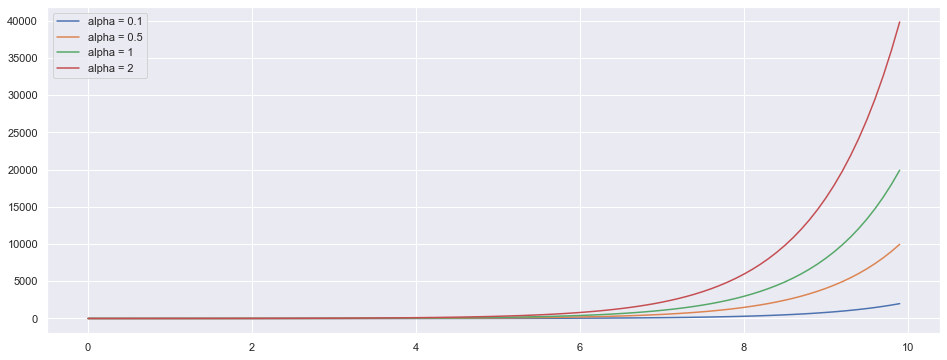

In [44]:
# Code here
x = np.arange(0,10,0.1)
plt.figure(figsize = (16,6))
sns.lineplot(x = x,
             y = ELU(x, 0.1), label = 'alpha = 0.1')
sns.lineplot(x = x,
             y = ELU(x, 0.5), label = 'alpha = 0.5')
sns.lineplot(x = x,
             y = ELU(x, 1)  , label = 'alpha = 1')
sns.lineplot(x = x,
             y = ELU(x, 2)  , label = 'alpha = 2')

As alpha increases, the graph for ELU activation function tilts upwards more. In other words, the increase in the function's slope is quicker for larger alpha values.

**(d) (3 points)** Graph the ELU activation function alongside `sigmoid()`, `tanh()`, `relu()`, and `leaky_relu()`. How does it differ when compared to the others?

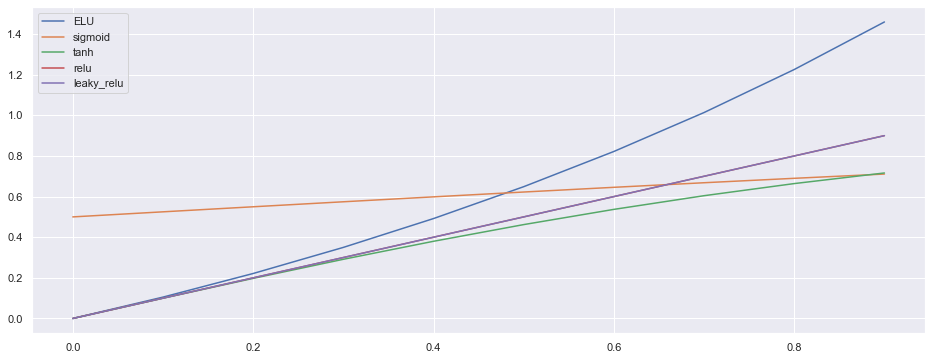

In [52]:
# Code here
x = np.arange(0,1,0.1)

sigmoid = 1/(1 + np.exp(-x)) 
tanh    = 2/(1 + np.exp(-2*x)) - 1
relu    =  np.maximum(0, x)
leaky_relu = np.where(x > 0, x, x * 0.01)

plt.figure(figsize = (16,6))
sns.lineplot(x = x,
             y = ELU(x, 1)  , label = 'ELU')
sns.lineplot(x = x,
             y = sigmoid  , label = 'sigmoid')
sns.lineplot(x = x,
             y = tanh  , label = 'tanh')
sns.lineplot(x = x,
             y = relu  , label = 'relu')
sns.lineplot(x = x,
             y = leaky_relu  , label = 'leaky_relu')

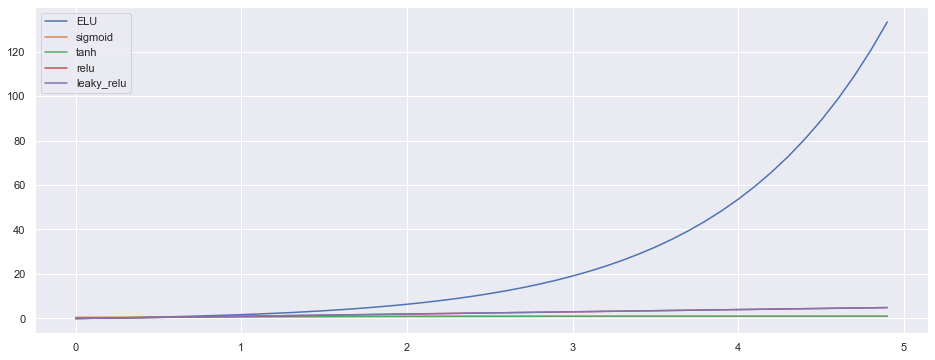

In [55]:
# Code here
x = np.arange(0,5,0.1)

sigmoid = 1/(1 + np.exp(-x)) 
tanh    = 2/(1 + np.exp(-2*x)) - 1
relu    =  np.maximum(0, x)
leaky_relu = np.where(x > 0, x, x * 0.01)

plt.figure(figsize = (16,6))
sns.lineplot(x = x,
             y = ELU(x, 1)  , label = 'ELU')
sns.lineplot(x = x,
             y = sigmoid  , label = 'sigmoid')
sns.lineplot(x = x,
             y = tanh  , label = 'tanh')
sns.lineplot(x = x,
             y = relu  , label = 'relu')
sns.lineplot(x = x,
             y = leaky_relu  , label = 'leaky_relu')

Explanation: 
All the other functions are asymptotically linear whereas this ELU function is exponential. It increases at a much faster rate than the other activation functions due to the exponential term it contains.

## [20 points] Exercise 2 - Descending MLR

The objective of this question is to construct a shallow neural network that is updated using gradient descent.

**(a) (4 points)** Design and implement a function that randomly generates a set of data and observed values for linear regression given dimensions and parameter values. Make sure to add "noise" to the predictions to avoid having a perfectly linear relationship and ensure that the first column of the design matrix contains only the value **1** so that the model has an intercept term.

$$\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

Implementation Guidelines:

- **Arguments:**
    - `n`: Number of Observations
    - `theta`: A vector of true parameter values up to `p`.
    - `noise`: A single value that adds distortion. 
    - `seed`: Value to generate the data under. 
- **Return:**
    - `X` the design matrix of dimensions `n x p`, with the first column a series of 1s. 
    - `y` the values observed with added noise.

_Hints:_

- NumPy has a built in way of generating random data with [`np.random.randn(n, p)`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)
- Moreover, to add a column, consider using [`np.append(new_col, data, 1)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html).


**Note:** _Python_ allows a function to return multiple values by having them prefixed by a comma `,` in the `return` statement. E.g. `return x1, x2` would return both `x1` and `x2`. These values may be unpacked and assigned individually on the same line as a function call:

```
x_v1, x_v2 = my_function()
```



In [113]:
# Code
def gen_data(n, theta, noise, seed):
    
    theta = theta.reshape((len(theta),1))
    p = theta.shape[0]
    
    np.random.seed(seed)
    
    # generate design matrix
    X = np.random.rand(n, p)
    X[:,0] = 1
    
    # predict y
    y = np.dot(X,theta)
    
    # add noise randomly
    noise = np.random.randint(2, size=n).reshape((n,1)) * noise
    y = y + noise
    
    return X, y
    

In [114]:
theta = np.array([1,2,3]).reshape((3,1))

In [115]:
X,y = gen_data(10, theta, 0.8, 1234)

In [116]:
X,y

(array([[1.        , 0.62210877, 0.43772774],
        [1.        , 0.77997581, 0.27259261],
        [1.        , 0.80187218, 0.95813935],
        [1.        , 0.35781727, 0.50099513],
        [1.        , 0.71270203, 0.37025075],
        [1.        , 0.50308317, 0.01376845],
        [1.        , 0.88264119, 0.36488598],
        [1.        , 0.07538124, 0.36882401],
        [1.        , 0.65137814, 0.39720258],
        [1.        , 0.31683612, 0.56809865]]),
 array([[3.55740076],
        [4.17772943],
        [5.47816242],
        [3.21861992],
        [4.33615632],
        [2.84747168],
        [4.65994033],
        [2.2572345 ],
        [3.49436402],
        [3.3379682 ]]))

**(b) (2 points)** Create a function for obtaining multiple linear regression predictions.

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `theta`: A vector holding the parameters `p`.
- **Return:**
    - A vector of prediction length `n`.



In [127]:
# Code

# im not sure if this question means theta is actual parameter values or estimated parameter values.
# hence, i assumed theta means actual paramter values

def predict_y(X, theta):
    y = X @ theta
    theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    y_hat = X @ theta_hat
    return y_hat

In [122]:
y_hat = predict_y(X, theta)
y_hat

array([[3.55740076],
       [3.37772943],
       [5.47816242],
       [3.21861992],
       [3.53615632],
       [2.04747168],
       [3.85994033],
       [2.2572345 ],
       [3.49436402],
       [3.3379682 ]])

**(c) (2 points)** Implement the mean squared error cost function for multiple linear regression in Python.

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
    - `theta`: A vector of parameter estimates `p`.
- **Return:**
    - Single value of cost.

In [125]:
# Code
def mse_cost(X, y, theta_hat):
    y_hat = X @ theta_hat
    MSE = np.sum(np.power(y_hat - y, 2)) / len(y_hat)
    return MSE

In [126]:
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
mse_cost(X, y, theta_hat)

0.04387390799763567

**(d) (8 points)** Build a function that performs gradient descent for multiple linear regression across all parameters.

That is, compute:

$$\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta_0, \theta_1, \cdots, \theta_p)$$

where:

$$\frac{\partial }{\partial \theta_j} J(\theta_0, \theta_1, \cdots, \theta_p) = \frac{1}{n} \sum_{i=1}^n \left({ x_{ij} \theta_j  - y_i}\right)x_{ij}$$

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
    - `theta`: A vector of parameter estimates `p`.
    - `alpha`: The learning rate for the problem. 
     - Default: `0.0001`
    -  `epochs`: Number of times to run gradient descent
- **Return:**
    - `theta_hat`: The estimated values for the parameters.
    - `cost`: Final cost value.

In [185]:
# Code
def gradient_desc(X, y, theta_hat, epochs, alpha = 0.0001):
    
    n = X.shape[0]
    p = len(theta_hat)
    print(n,p)
    
    theta_updates = theta_hat.copy().astype(float)
    y_hat = y.copy()
    
    # perform gradient descent
    for i in range(epochs):
        
        # get y_hat
        y_hat = X @ theta_updates
        
        # perform theta update through gradient descent
        for j in range(p):
            total = 0
            for i in range(n):
                
                total += (X[i, j] * theta_updates[j,0] - y_hat[i,0]) * X[i, j]
                
            derivative = total / n
            theta_updates[j,0] = theta_updates[j,0] - alpha * derivative
            
    return theta_updates, mse_cost(X, y, theta_updates)
        

**(e) (4 points)** With the functions in hand, attempt to perform an estimation under conditions:

_Scenario 1_:

$$
\begin{align}
\theta_0 &= -2.8, \theta_1 = 1.5\\
n &= 250, epoch = 500 \\
\end{align}
$$

_Scenario 2_:

$$
\begin{align}
\theta_0 &= 0.5, \theta_1 = -1, \theta_2 = 2.3 \\
n &= 100, epoch = 500 \\
\end{align}
$$

**For reproducibility, set a seed using the last four digits of your UIN.**

In [182]:
# Scenario 1
theta = np.array([[-2.8],[1.5]])

X, y = gen_data(n = 250, theta = theta, noise = 0.8, seed = 6729)

theta_update, cost = gradient_desc(X = X, y = y, theta_hat = np.array([[-2.7],[1.8]]),
                                   epochs = 500, alpha = 0.001)
theta_update, cost

250 2


(array([[-2.33511613],
        [ 1.18459109]]),
 0.18738068299377517)

In [186]:
# Scenario 2
theta = np.array([[0.5],[-1.0],[2.3]])

X, y = gen_data(n = 100, theta = theta, noise = 0.8, seed = 6729)

theta_update, cost = gradient_desc(X = X, y = y, theta_hat = np.array([[0.8],[1.2],[2.0]]),
                                   epochs = 500, alpha = 0.001)
theta_update, cost

100 3


(array([[1.68981841],
        [1.7455524 ],
        [2.47500685]]),
 5.294423578701742)

## [15 points] Exercise 3 - Make a Plan



Consider a neural network being built to classify color images of size 4 x 3 x 3 into 4 different categories. The architecture of the network has two hidden layers with 5 nodes in the first and 3 nodes in second layer.

**(a) (5 Points)** Sketch the network with all connections. Make sure to include bias nodes for each layer.

**(b) (10 Points)** Write the equations for each layer of the neural network. Make sure to specify the dimensions expected for each equation.

![alt text](./Exercise_3.jpeg)

## [14 Points] Exercise 4 - Neuron by Hand

Consider a single neuron that takes $z = b + w_1 x_1 + w_2 x_2$ and has an activation function of $\operatorname{relu}(x)$.

**(a) (6 Points)** Sketch out a computational graph that shows how the computation is being performed.

**(b) (2 Points)** Perform a forward propagation step given data:

$$
\begin{align}
b &= 1.2 \\
w_1 &= 0.3, w_2 = 0.5 \\
x_1 &= 1, x_2 = 2 \\
\end{align}
$$

**(c) (6 Points)** Compute the partial derivatives for backward propagation.

... Upload drawing image ...

![alt text](./Exercise_4.jpeg)